# Import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Prıprava dat:
1. Nactete dataset seeds.
2. Proverte dataset na prıtomnost chybejıcıch hodnot a odlehlych hodnot.
3. Vizualizujte data (sedm atributu) pomocı boxplot a paralel coordinate plot.
4. Normalizujte data, aby byly vsechny atributy ve stejnem meritku.


   feature1  feature2  feature3  feature4  feature5  feature6  feature7
0     15.26     14.84    0.8710     5.763     3.312     2.221     5.220
1     14.88     14.57    0.8811     5.554     3.333     1.018     4.956
2     14.29     14.09    0.9050     5.291     3.337     2.699     4.825
3     13.84     13.94    0.8955     5.324     3.379     2.259     4.805
4     16.14     14.99    0.9034     5.658     3.562     1.355     5.175
feature1    0
feature2    0
feature3    0
feature4    0
feature5    0
feature6    0
feature7    0
dtype: int64
feature1    0
feature2    0
feature3    5
feature4    0
feature5    0
feature6    2
feature7    0
dtype: int64


C:\Users\tomik\AppData\Local\Temp\ipykernel_17740\1274203381.py:1: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  data = pd.read_csv("seeds_dataset.txt", sep="\t", header=None, names=["feature1", "feature2", "feature3", "feature4", "feature5", "feature6", "feature7"], index_col=False)


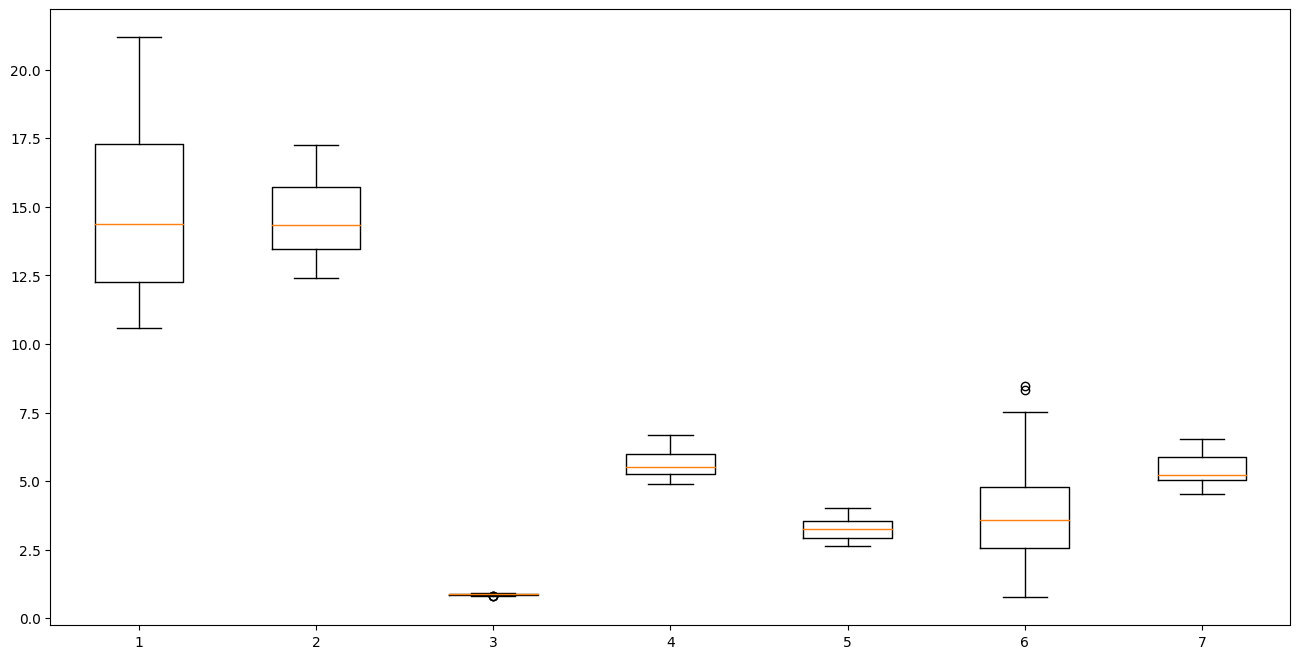

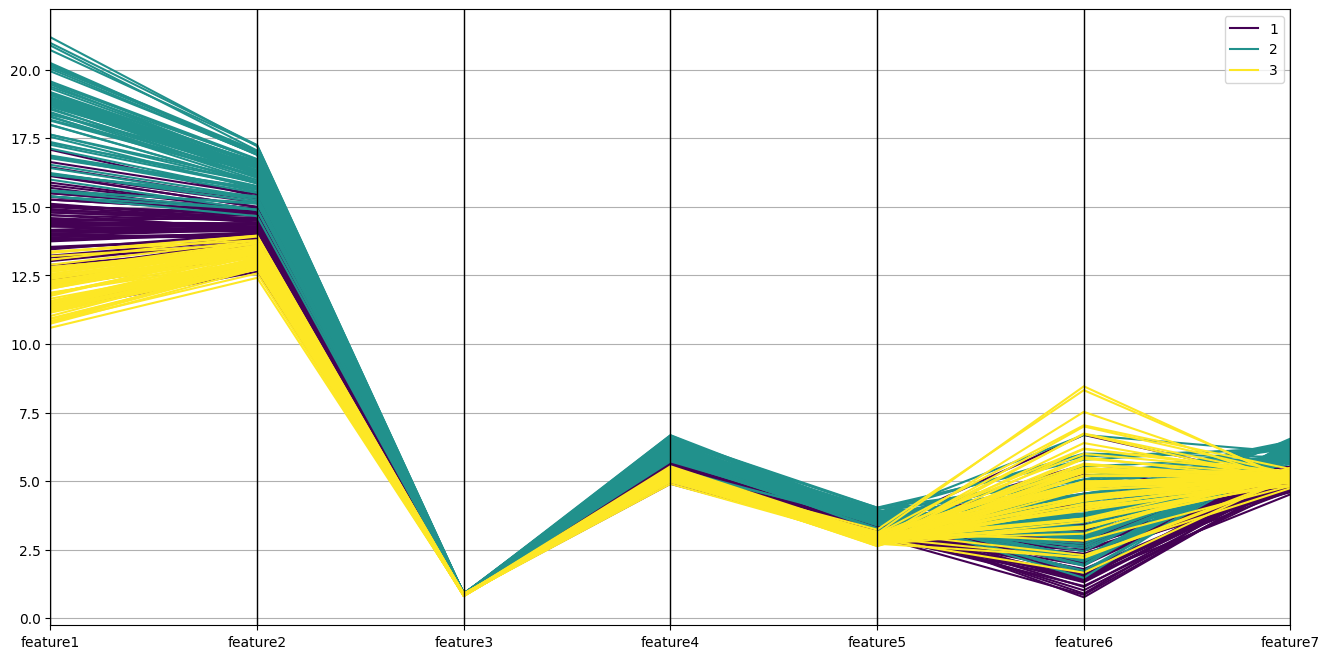

   feature1  feature2  feature3  feature4  feature5  feature6  feature7
0  0.440982  0.502066  0.570780  0.486486  0.486101  0.189302  0.345150
1  0.405099  0.446281  0.662432  0.368806  0.501069  0.032883  0.215165
2  0.349386  0.347107  0.879310  0.220721  0.503920  0.251453  0.150665
3  0.306893  0.316116  0.793103  0.239302  0.533856  0.194243  0.140817
4  0.524079  0.533058  0.864791  0.427365  0.664291  0.076701  0.322994


In [2]:
data = pd.read_csv("seeds_dataset.txt", sep="\t", header=None, names=["feature1", "feature2", "feature3", "feature4", "feature5", "feature6", "feature7"], index_col=False)
data2 = pd.read_csv("seeds_dataset.txt", sep="\t", header=None, names=["feature1", "feature2", "feature3", "feature4", "feature5", "feature6", "feature7", "target"], index_col=False)

print(data.head())
print(data.isna().sum())

def odlehle_hodnoty(data, threshold=1.25):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    return (data < Q1 - threshold * IQR) | (data > Q3 + threshold * IQR)

print(odlehle_hodnoty(data).sum())

plt.figure(figsize=(16, 8))
plt.boxplot(data)
plt.show()

plt.figure(figsize=(16, 8))
pd.plotting.parallel_coordinates(data2, "target", colormap='viridis')
plt.show()

scaler = MinMaxScaler()
columns_to_normalize = ["feature1", "feature2", "feature3", "feature4", "feature5", "feature6", "feature7"]
data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])
print(data.head())

# Hierarchicke shlukovanı:
1. Pouzijte hierarchicke shlukovanı, abyste zjistili mozne shluky.
2. Vyberte vhodnou metriku vzdalenosti (napr. Euklidovska vzdalenost) a
3. metodu spojovanı (napr. Wardova metoda).
4. Vytvorte dendrogram pro vizualizaci vztahu mezi jednotlivymi shluky.
5. Ohodnodte vysledek shlukovanı pomocı odpovidajicıch criteria.
6. Vizalizujte vysledek shlukovani

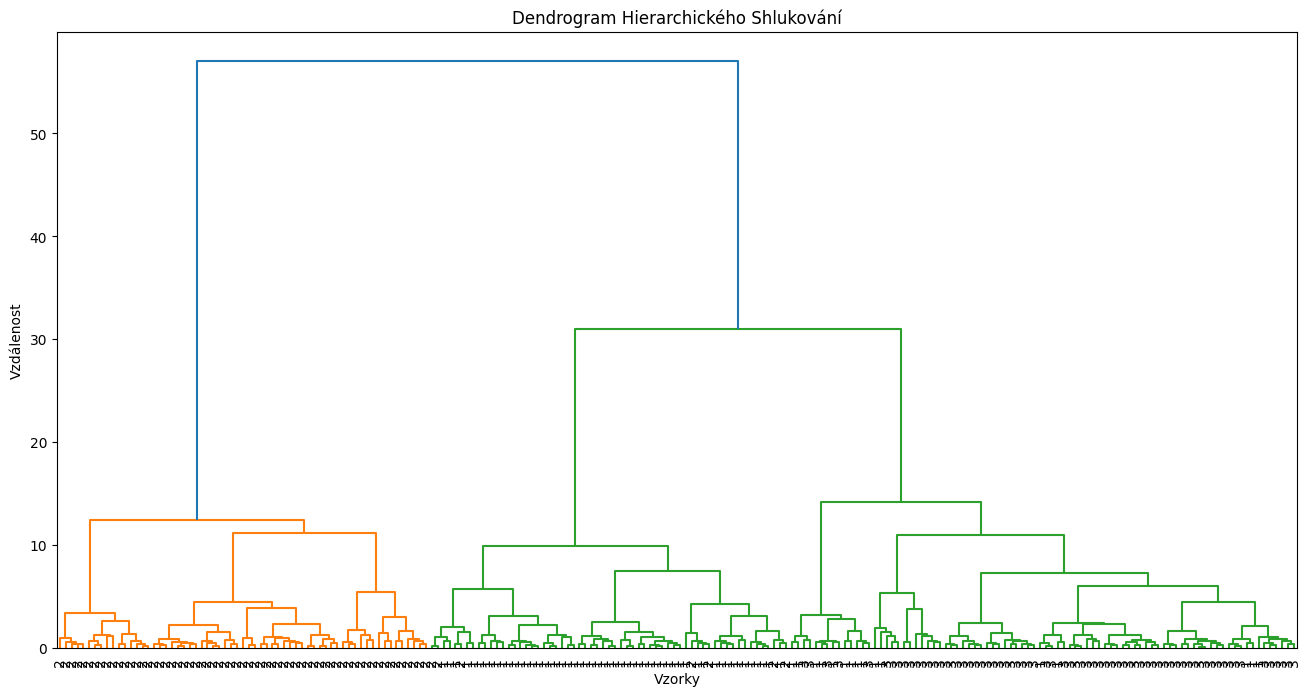

In [4]:
columns_for_clustering = ["feature1", "feature2", "feature3", "feature4", "feature5", "feature6", "feature7"]
distance_metric = 'euclidean'
linkage_method = 'ward'
dendrogram_data = linkage(data2[columns_for_clustering], method=linkage_method, metric=distance_metric)

plt.figure(figsize=(16, 8))
dendrogram(dendrogram_data, labels=data2['target'].values, leaf_rotation=90, leaf_font_size=10)
plt.title('Dendrogram Hierarchického Shlukování')
plt.xlabel('Vzorky')
plt.ylabel('Vzdálenost')
plt.show()

# K-means shlukovanı:
1. Pouzijte algoritmus K-means pro rozdelenı dat do K shluku.
2. Ohodnodte vysledek shlukovanı pomocı odpovidajicıch criteria.
3. Vizalizujte vysledek shlukovanı

C:\Users\tomik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


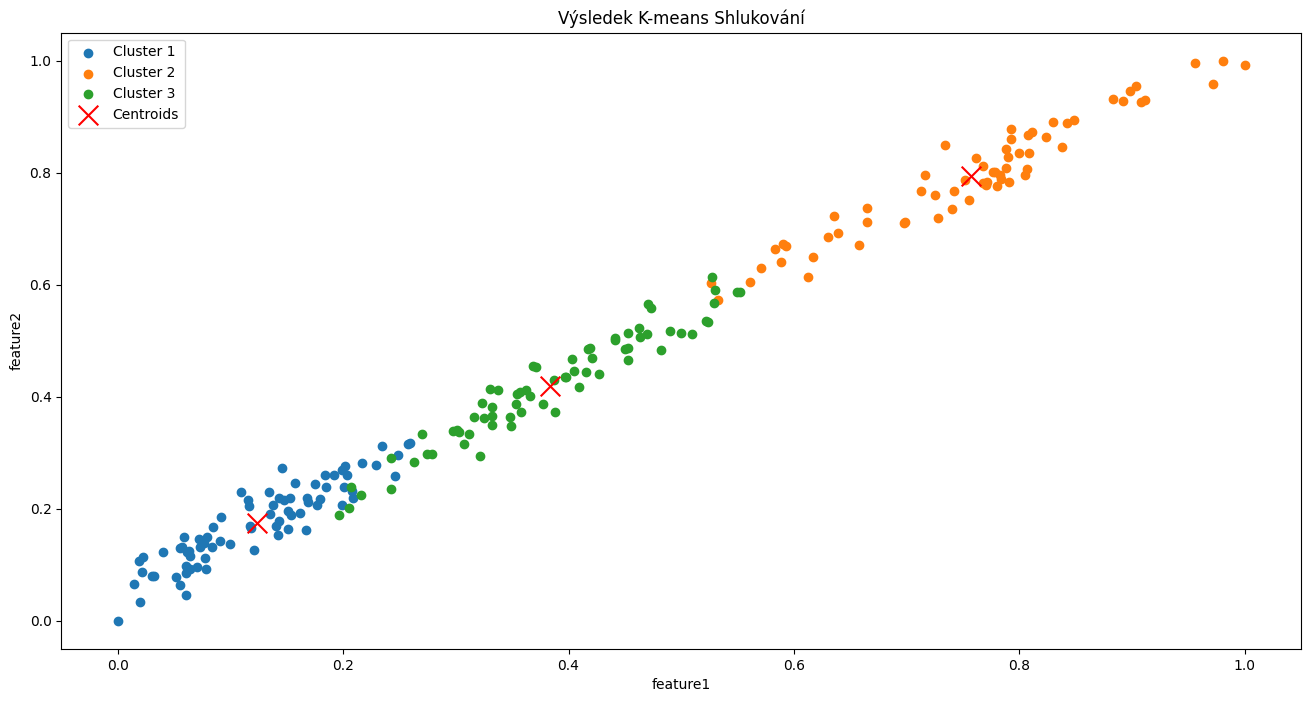

In [5]:
# Počet shluků (K)
k_clusters = 3

# Inicializace a fitování modelu K-means
kmeans = KMeans(n_clusters=k_clusters, random_state=42)
data['cluster'] = kmeans.fit_predict(data[columns_for_clustering])

# Vizualizace výsledku shlukování
plt.figure(figsize=(16, 8))

for cluster in range(k_clusters):
    cluster_data = data[data['cluster'] == cluster]
    plt.scatter(cluster_data[columns_for_clustering[0]], cluster_data[columns_for_clustering[1]], label=f'Cluster {cluster + 1}')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=200, c='red', label='Centroids')
plt.title('Výsledek K-means Shlukování')
plt.xlabel(columns_for_clustering[0])
plt.ylabel(columns_for_clustering[1])
plt.legend()
plt.show()

# Hybridnı model Hierarchical K-means:
1. Vyuzijte vysledky hierarchickeho shlukovanı k definovanı pocatecnıch stredu. 
2. pro K-means.
3. Aplikujte K-means shlukovanı s temito inicializovanymi stredy.
4. Ohodnodte vysledek shlukovanı pomocı odpovidajicıch criteria.
5. Vizalizujte vysledek shlukovanı

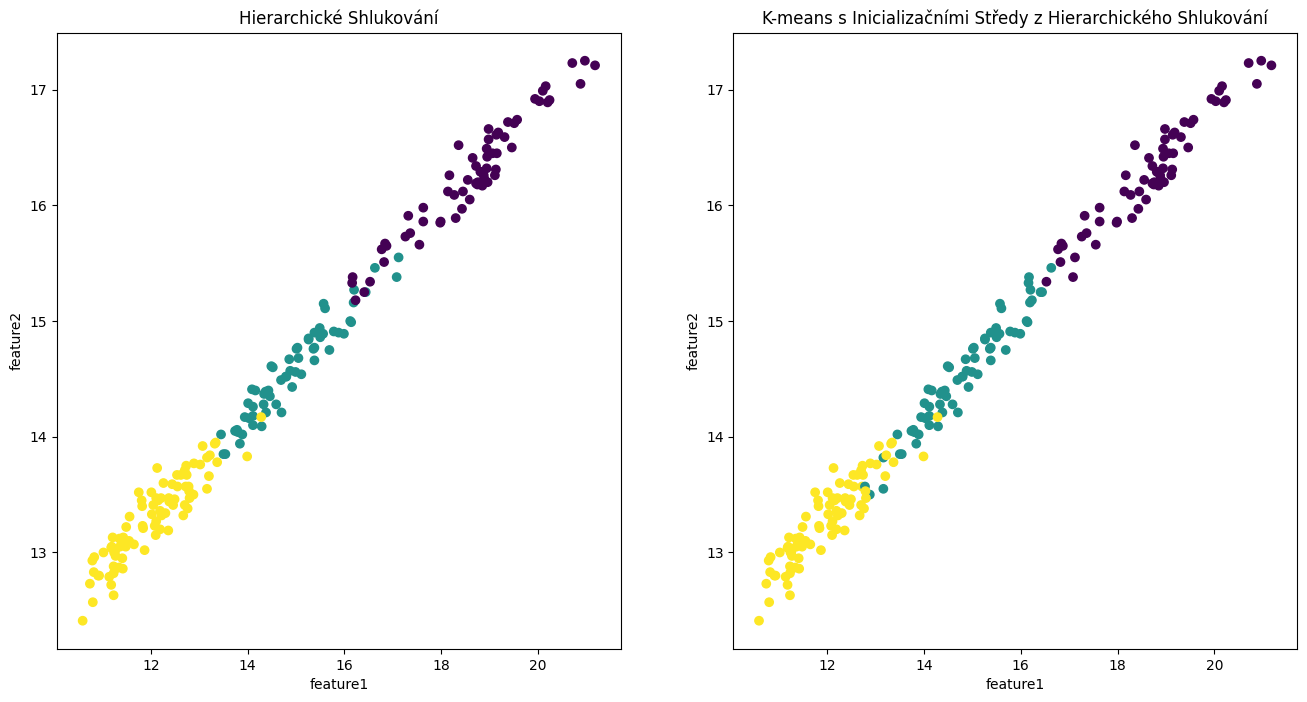

In [11]:
# Hierarchické shlukování pro inicializační středy
linkage_method = 'ward'
hierarchical_clusters = fcluster(linkage(data2[columns_for_clustering], method=linkage_method, metric='euclidean'), t=3, criterion='maxclust')

# Přidání výsledných shluků z hierarchického shlukování do původních dat
data2['hierarchical_cluster'] = hierarchical_clusters

# Inicializační středy pro K-means z hierarchického shlukování
initial_centers = data2.groupby('hierarchical_cluster')[columns_for_clustering].mean()

# K-means s inicializačními středami z hierarchického shlukování
k_clusters = 3
kmeans = KMeans(n_clusters=k_clusters, init=initial_centers.values, n_init=1, random_state=42)
data2['kmeans_cluster'] = kmeans.fit_predict(data2[columns_for_clustering])

# Vizualizace výsledků
plt.figure(figsize=(16, 8))

# Výsledky hierarchického shlukování
plt.subplot(1, 2, 1)
plt.scatter(data2[columns_for_clustering[0]], data2[columns_for_clustering[1]], c=data2['hierarchical_cluster'], cmap='viridis')
plt.title('Hierarchické Shlukování')
plt.xlabel(columns_for_clustering[0])
plt.ylabel(columns_for_clustering[1])

# Výsledky K-means
plt.subplot(1, 2, 2)
plt.scatter(data2[columns_for_clustering[0]], data2[columns_for_clustering[1]], c=data2['kmeans_cluster'], cmap='viridis')
plt.title('K-means s Inicializačními Středy z Hierarchického Shlukování')
plt.xlabel(columns_for_clustering[0])
plt.ylabel(columns_for_clustering[1])

plt.show()